# Classifying Iris Species

#### Let's assume that a hobby botanist is interested in distinguishing the species of some iris flowers that she has found. She has collected some measurements associated with each iris: the length and width of the petals and the length and width of the sepals, all measured in centimetres. 
#### She also has the measurements of some irises that have been previously identified by an expert botanist as belonging to the species setosa, versicolor, or virginica. For these measurements, she can be certain of which species each iris belongs to. Let's assume that these are the only species our hobby botanist will encounter in the wild.

In [1]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "http://s5047.pcdn.co/wp-content/uploads/2015/04/iris_petal_sepal.png")

# Import libraries

In [5]:
# Importing numpy, pandas and Series + DataFrame:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

# Imports for plotting:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [6]:
from sklearn import datasets

# Importing and loading the iris dataset
from sklearn.datasets import load_iris
iris = sns.load_dataset('iris')

##### First five rows of iris dataset: 

In [4]:
print(iris.head())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


##### The main categories are:

In [5]:
iris.keys()

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

##### There are three iris species in this dataset: setosa, versicolor and virginica. 

In [14]:
iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [15]:
iris['species'].keys()

RangeIndex(start=0, stop=150, step=1)

## Training and testing data

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
# Defining target set y, and a training set X:
y = iris.species
X = iris.drop('species', axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0, stratify = y)

## Visualising data

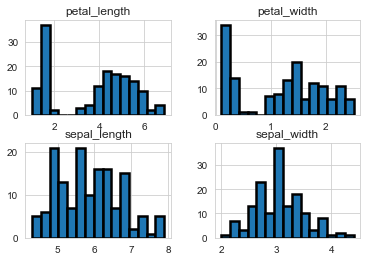

In [8]:
# Histograms for petal and sepal data (for training set X)
iris.hist(edgecolor='black', linewidth=2.5, bins = 15)
plt.show()

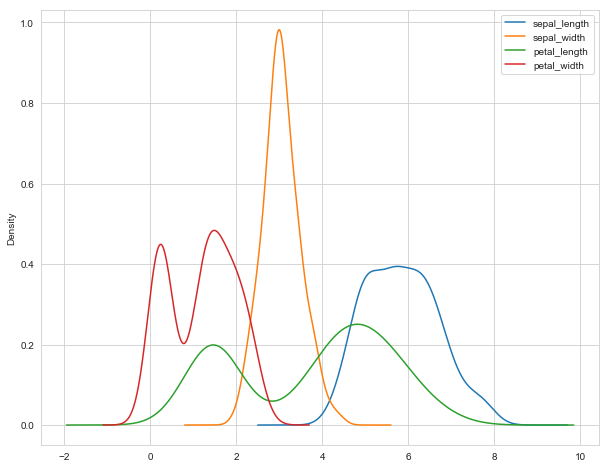

In [23]:
# Density
iris.plot(kind = "density", figsize=(10,8))

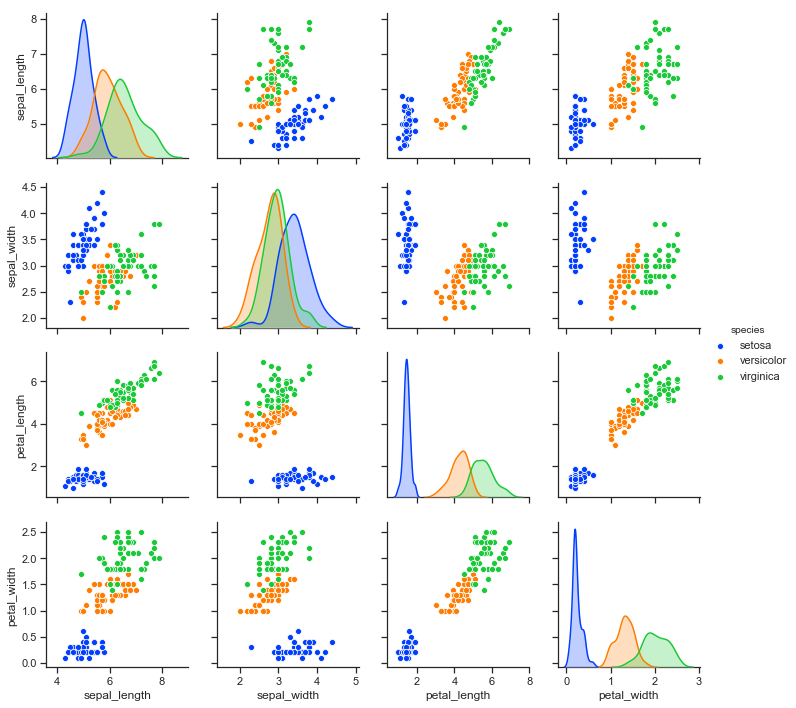

In [24]:
# Plotting the features of the training set X (this gives us data viz for each feature) 
sns.set(style="ticks")
iris = sns.load_dataset('iris')
sns.pairplot(iris, hue='species',palette='bright')
plt.show()

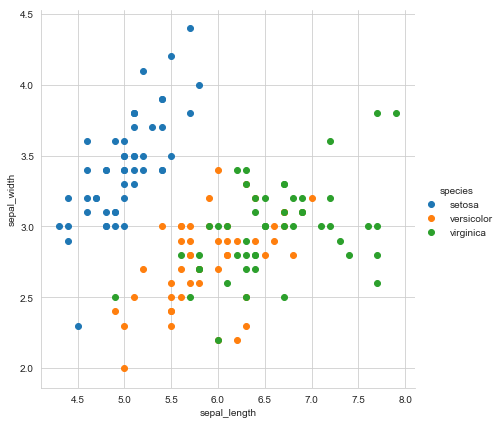

In [14]:
# Visualising data with FacetGrid, this colors the scatterplot by species (can be found above)
sns.FacetGrid(iris, hue = 'species', size=6) \
    .map(plt.scatter, 'sepal_length','sepal_width') \
    .add_legend()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11d5dae48>,
      dtype=object)

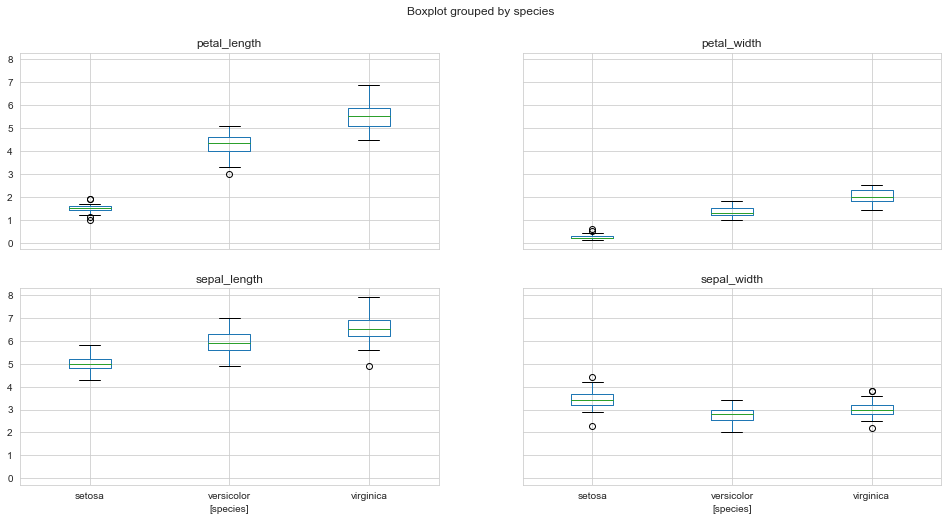

In [11]:
# Visualising data with boxplots:
iris.boxplot(by = 'species', figsize = (16,8))

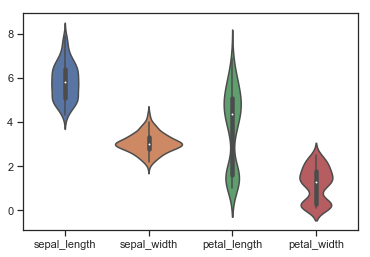

In [23]:
# Violin plot

sns.violinplot(data=iris)

##### We can distinguish setosa according to petal length and width, data for versicolor and virginica is scattered.  

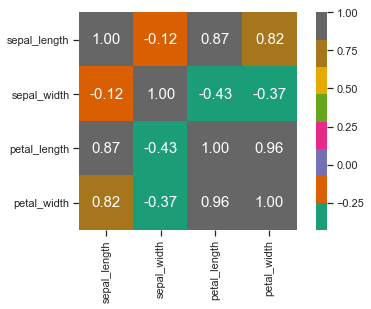

In [26]:
# Drawing  heatmap with input as the correlation matrix calculted by(df.corr())
plt.figure(figsize=(7,4)) 

sns.heatmap(iris.corr(),cbar = True, square = True, annot=True, fmt='.2f',annot_kws={'size': 15},cmap='Dark2') 
plt.show()

## Building the model: k-Nearest Neighbors

In [27]:
# The most important parameter of k-Nearest Neighbors classifier is the number of neighbors, which we will set to 1:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 1)

In [28]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

## Making predictions 

In [29]:
x_new = np.array([[5, 2.9, 1, 0.2]])
x_new.shape

(1, 4)

In [30]:
prediction = knn.predict(x_new)
print('Prediction: {}'.format(prediction))
print('Predicted target name: {}'.format(iris['species'][prediction]))

Prediction: ['setosa']
Predicted target name: setosa    NaN
Name: species, dtype: object


## Evaluating the model 

In [32]:
y_pred = knn.predict(X_test)
print('Test set predictions:\n {}'.format(y_pred))

Test set predictions:
 ['virginica' 'virginica' 'setosa' 'setosa' 'versicolor' 'setosa'
 'versicolor' 'virginica' 'setosa' 'versicolor' 'setosa' 'virginica'
 'setosa' 'virginica' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'setosa' 'versicolor' 'virginica' 'setosa' 'versicolor'
 'virginica' 'virginica' 'virginica' 'virginica' 'versicolor' 'virginica'
 'versicolor' 'setosa' 'setosa' 'versicolor' 'versicolor' 'virginica'
 'versicolor' 'setosa' 'setosa' 'versicolor' 'setosa' 'virginica' 'setosa'
 'setosa' 'virginica']


In [33]:
print('Test set score: {:.2f}'.format(np.mean(y_pred == y_test)))

Test set score: 0.98


In [34]:
print('Test set score {:.2f}'.format(knn.score(X_test,y_test)))

Test set score 0.98
